<a href="https://colab.research.google.com/github/catherineabcde/Generative-AI-Text-and-Image-Synthesis/blob/main/Week%203%20LLM%20application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **<font color="#0000FF">認識 Softmax（Week 3 作業）</font>**

### **<font color='4169E1'>什麼是 Softmax？</font>**

Softmax 是機器學習中常用的激活函數，特別用於多類別分類問題。它的數學公式為：

$$\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$$

其中 $x_i$ 是第 $i$ 個輸入值。

### **<font color='4169E1'>為什麼說 Softmax 有「贏者通吃」的特性？</font>**

由於 Softmax 使用指數函數 $e^x$，即使輸入值之間的差異不大，經過指數放大後，最大值會被大幅放大，而較小的值會被壓縮，形成「贏者通吃」的效果。

### **<font color='4169E1'>1. 導入必要的函式庫</font>**

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

下載字體讓圖表能顯示繁體中文字

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm

In [ ]:
# 下載字體
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2025-09-29 06:46:11--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.107.138, 142.250.107.139, 142.250.107.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.107.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-09-29 06:46:11--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.117.132, 2607:f8b0:400e:c0a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.117.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  83.4MB/s    in 0.2s    

2025-09-29 

加入 `matplotlib` 字體
> 參考資料：[Colab 進行matplotlib繪圖時顯示繁體中文]("https://nbviewer.org/github/yenlung/Deep-Learning-Basics/blob/master/colab99_%E5%9C%A8_matplotlib_%E4%B8%AD%E4%BD%BF%E7%94%A8%E4%B8%AD%E6%96%87.ipynb?fbclid=IwAR0qEzwT_62unuwy2aAs5-E5HOVsFus8OZY_b4E0BIjDqPS4vcnEutEMpok")

In [ ]:
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')


### **<font color='4169E1'>2.實作 Softmax 函數</font>**

計算 Softmax 函數
```
參數:
    x: 輸入的數值陣列
回傳:
    softmax 處理後的機率分布
```



In [ ]:
def softmax(x):

    # 為了數值穩定性，先減去最大值
    x_stable = x - np.max(x)

    # 計算指數
    exp_x = np.exp(x_stable)

    # 計算 softmax
    softmax_result = exp_x / np.sum(exp_x)

    return softmax_result

測試 softmax 函數

In [ ]:
test_input = np.array([1, 2, 3])
print(f"輸入: {test_input}")
print(f"Softmax 輸出: {softmax(test_input)}")
print(f"總和: {np.sum(softmax(test_input))}")

輸入: [1 2 3]
Softmax 輸出: [0.09003057 0.24472847 0.66524096]
總和: 0.9999999999999999


最後總和結果應該要等於 1 (因為是機率分布的總和)

### **<font color='4169E1'>3. 視覺化函數的輸入與輸出</font>**
為了幫助理解，我們視覺化輸入值和對應的 Softmax 結果

In [ ]:
def visualize_softmax(values, title="Softmax 結果"):

    """
    Visualize the values before and after Softmax
    """

    softmax_values = softmax(values)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # 原始值柱狀圖
    ax1.bar(range(len(values)), values, alpha=0.7, color='skyblue')
    ax1.set_title('原始輸入值')
    ax1.set_xlabel('索引')
    ax1.set_ylabel('數值')
    ax1.set_xticks(range(len(values)))

    # Softmax 結果柱狀圖
    ax2.bar(range(len(values)), softmax_values, alpha=0.7, color='lightcoral')
    ax2.set_title('Softmax 輸出（機率）')
    ax2.set_xlabel('索引')
    ax2.set_ylabel('機率')
    ax2.set_xticks(range(len(values)))
    ax2.set_ylim(0, 1) # fix the shown range of the y axis

    plt.tight_layout() # avoid overlapped or cut by edges
    plt.show()

    # 印出數值比較
    print("\n" + "="*50)
    print(f"{'索引':<6} {'原始值':<10} {'Softmax':<15} {'百分比':<10}")
    print("="*50)
    for i, (orig, soft) in enumerate(zip(values, softmax_values)):
        print(f"{i:<6} {orig:<10.3f} {soft:<15.6f} {soft*100:<10.2f}%")
    print("="*50)

def interactive_softmax_3values(x1=1.0, x2=2.0, x3=3.0):

    """
    interactive function for softmax
    """

    values = np.array([x1, x2, x3])
    visualize_softmax(values)

### **<font color='4169E1'>4. 示範：三個數值經過 softmax 的變化</font>**

In [ ]:
print("🎯 互動式 Softmax 示範 - 三個數值")
print("\n")
print("請調整下方的滑桿，觀察 Softmax 的變化：")

interact(interactive_softmax_3values,
         x1=FloatSlider(min=-5, max=5, step=0.1, value=1.0, description='數值 1:'),
         x2=FloatSlider(min=-5, max=5, step=0.1, value=2.0, description='數值 2:'),
         x3=FloatSlider(min=-5, max=5, step=0.1, value=3.0, description='數值 3:'));

🎯 互動式 Softmax 示範 - 三個數值


請調整下方的滑桿，觀察 Softmax 的變化：


interactive(children=(FloatSlider(value=1.0, description='數值 1:', max=5.0, min=-5.0), FloatSlider(value=2.0, d…

### **<font color='4169E1'>5. 探索「贏者通吃」的特性</font>**

我們利用三種情境的視覺化結果來觀察 softmax 贏者通吃的特性，其中情境描述如下：

1.   三個數數值接近
2.   三個數數值差異中等
3.   三個數數值差異很大





In [ ]:
def demonstrate():

    print("🔍 探索 Softmax 的「贏者通吃」特性")
    print("\n讓我們比較幾種不同的情況：")

    print("\n📊 情境 1: 數值很接近")
    case1 = np.array([2.0, 2.1, 2.2])
    soft1 = softmax(case1)
    print(f"輸入: {case1}")
    print(f"Softmax: {soft1}")
    print(f"最大值佔比: {np.max(soft1):.1%}")

    print("\n📊 情境 2: 數值差異中等")
    case2 = np.array([1.0, 2.0, 3.0])
    soft2 = softmax(case2)
    print(f"輸入: {case2}")
    print(f"Softmax: {soft2}")
    print(f"最大值佔比: {np.max(soft2):.1%}")

    print("\n📊 情境 3: 數值差異很大")
    case3 = np.array([1.0, 3.0, 5.0])
    soft3 = softmax(case3)
    print(f"輸入: {case3}")
    print(f"Softmax: {soft3}")
    print(f"最大值佔比: {np.max(soft3):.1%}")

    fig, axes = plt.subplots(2, 3, figsize=(15, 8))

    cases = [case1, case2, case3]
    softmaxes = [soft1, soft2, soft3]
    titles = ["數值接近", "差異中等", "差異很大"]

    for i, (case, soft, title) in enumerate(zip(cases, softmaxes, titles)):
        # 原始值
        axes[0, i].bar(range(len(case)), case, alpha=0.7, color='skyblue')
        axes[0, i].set_title(f'{title} - 原始值')
        axes[0, i].set_ylim(0, 6)

        # Softmax 結果
        axes[1, i].bar(range(len(soft)), soft, alpha=0.7, color='lightcoral')
        axes[1, i].set_title(f'{title} - Softmax')
        axes[1, i].set_ylim(0, 1)
        axes[1, i].set_ylabel('機率')

    plt.tight_layout()
    plt.show()

**執行**

執行以下示範函數以觀察數值差異不同的 Softmax 結果分佈。

🔍 探索 Softmax 的「贏者通吃」特性

讓我們比較幾種不同的情況：

📊 情境 1: 數值很接近
輸入: [2.  2.1 2.2]
Softmax: [0.30060961 0.33222499 0.3671654 ]
最大值佔比: 36.7%

📊 情境 2: 數值差異中等
輸入: [1. 2. 3.]
Softmax: [0.09003057 0.24472847 0.66524096]
最大值佔比: 66.5%

📊 情境 3: 數值差異很大
輸入: [1. 3. 5.]
Softmax: [0.01587624 0.11731043 0.86681333]
最大值佔比: 86.7%


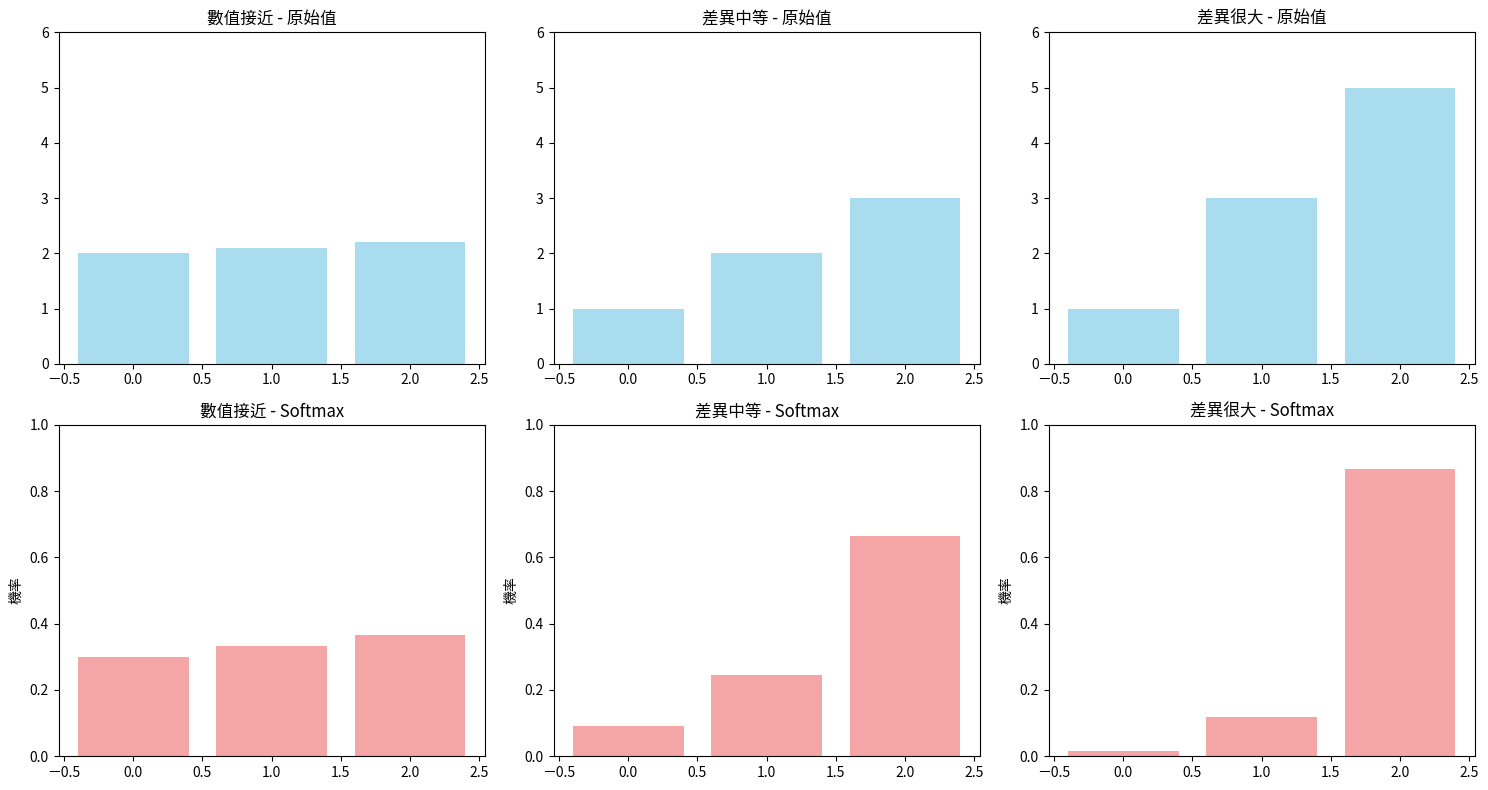

In [ ]:
demonstrate()

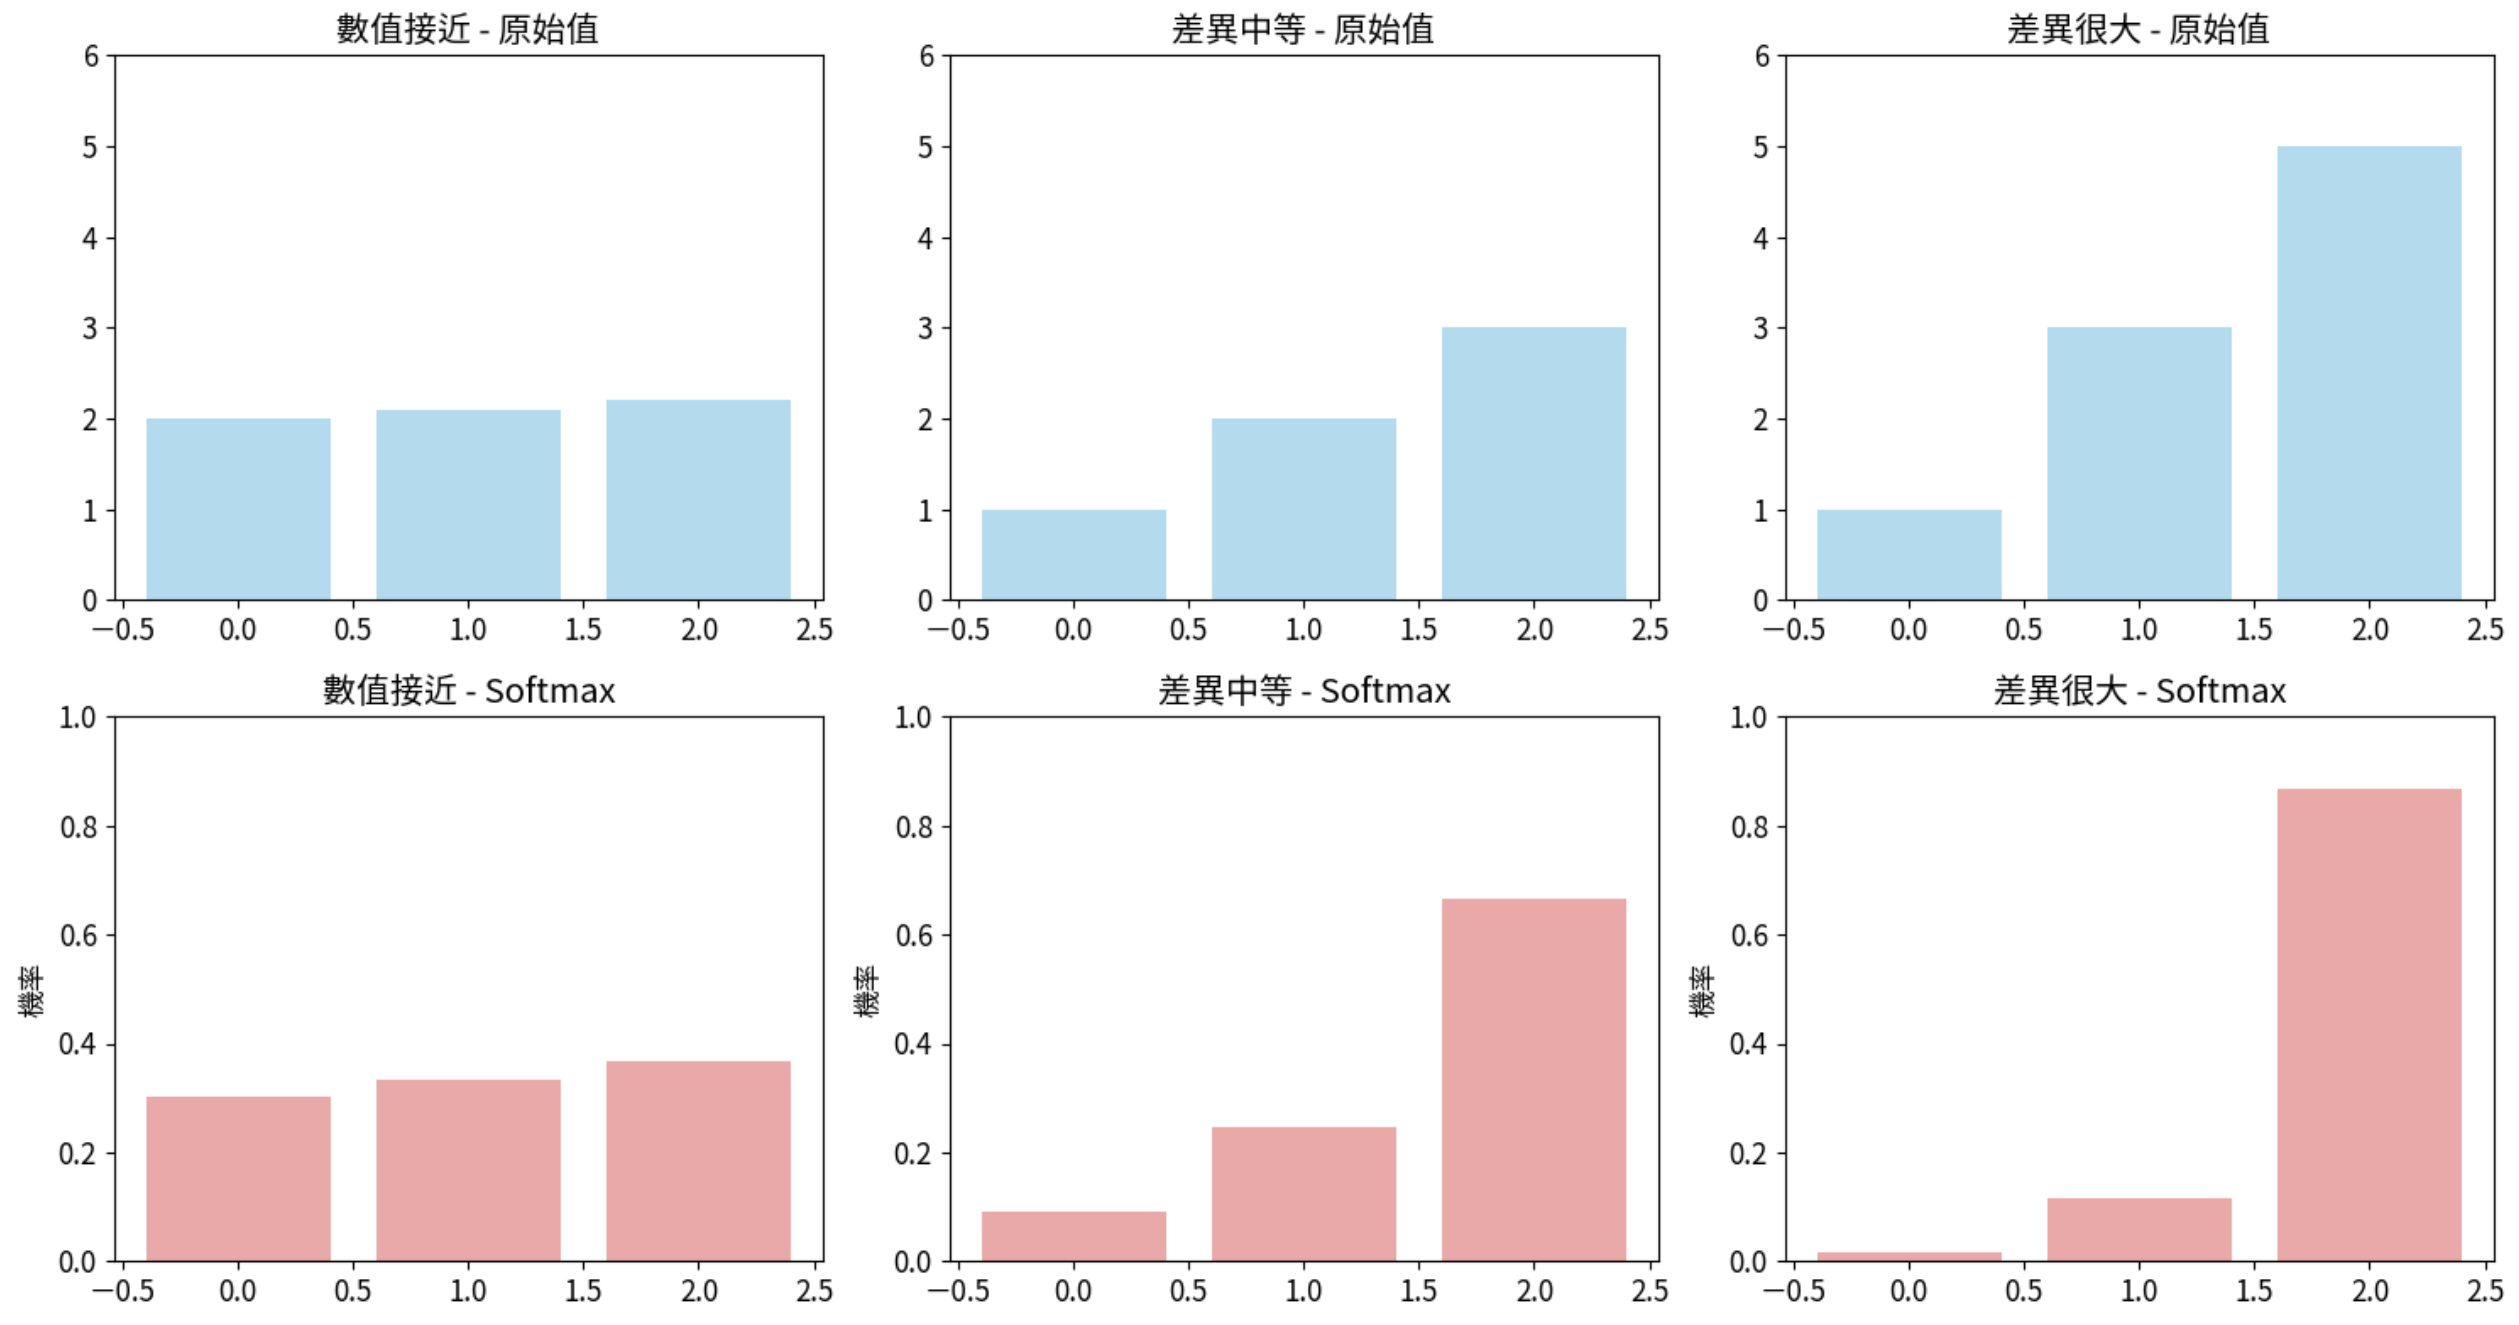

**觀察上圖**

此為實作上一段程式碼的結果，呈現數據的數值差距不同的情況下，Softmax 結果的比較。這是特別設計來觀察我們所說的「贏者通吃」的特性。可以看出在數值差距大的情境下，數據彼此 softmax 後的結果差異更加明顯。

### **<font color='4169E1'>6. Softmax 的溫度參數及其影響</font>**

在這裡，我們多設定一個 softmax 函數的參數：溫度 (`temperature`)，控制銳利度。

**(1) 什麼是溫度參數？什麼是銳利度？**

溫度参數在 softmax 中是用来控制輸出機率隨機性水平。具有溫度參數 T 的 softmax 函数可以定義為：
$$\text{softmax}(x_i) = \frac{e^{\frac{x_i}{T}}}{\sum_{j=1}^{n} e^{\frac{x_j}{T}}}$$

其中 T 可以取任意數值，舉例來說：

* 當 T = 0.5，我們會說這是低溫，這會讓原本的數值差距更明顯，數值大的數據會得到更多的機率，機率分布呈現很尖銳的形狀，因此我們也稱這種情況為尖銳，也就是銳利度高。
* 當 T = 1.0，機率分布維持原本 softmax 後的結果。
* 當 T = 2.0，我們會說這是高溫，這會讓原本的數值差距變小，因此原本若數據差距很大，最後的機率分布結果也不會差太多，我們稱這種情況為平滑，也就是銳利度低。

**(2) 高低溫的適用情境**

通常在需要明確選擇的任務中，我們會設定低溫（也就是銳利度高）；而我們在探索、包含多樣性的任務下，會選擇採用高溫（也就是銳利度低）。

> 參考資料：[具有温度系数（Temperature）的Softmax函数原创]("https://blog.csdn.net/keeppractice/article/details/137431015")


**執行**

執行以下程式，我們可以藉由調整滑桿來觀察在不同溫度下的 Softmax 結果，觀察前述的「贏者通吃」的特性是否會受到影響。

In [ ]:
def softmax_with_temperature(x, temperature=1.0):

    x_temp = x / temperature
    x_stable = x_temp - np.max(x_temp)
    exp_x = np.exp(x_stable)
    return exp_x / np.sum(exp_x)

def interactive_temperature_demo(x1=1.0, x2=2.0, x3=3.0, temperature=1.0):
    """
    互動式溫度參數示範
    """
    values = np.array([x1, x2, x3])

    # 計算不同溫度下的結果
    temps = [0.5, 1.0, 2.0]
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    for i, temp in enumerate(temps):
        soft = softmax_with_temperature(values, temp)
        axes[i].bar(range(len(values)), soft, alpha=0.7,
                   color=['skyblue', 'lightgreen', 'lightcoral'][i])
        axes[i].set_title(f'溫度 = {temp}')
        axes[i].set_ylim(0, 1)
        axes[i].set_ylabel('機率')
        axes[i].set_xticks(range(len(values)))

    plt.tight_layout()
    plt.show()

    # 顯示當前溫度的詳細結果
    current_soft = softmax_with_temperature(values, temperature)
    print(f"\n當前設定 - 溫度: {temperature}")
    print(f"輸入值: {values}")
    print(f"Softmax 輸出: {current_soft}")
    print(f"最大值佔比: {np.max(current_soft):.1%}")

print("🌡️ 溫度參數對 Softmax 的影響")
print("溫度越低 → 越「銳利」（贏者通吃更明顯）")
print("溫度越高 → 越「平滑」（分布更均勻）")

interact(interactive_temperature_demo,
         x1=FloatSlider(min=-3, max=3, step=0.1, value=1.0, description='數值 1:'),
         x2=FloatSlider(min=-3, max=3, step=0.1, value=2.0, description='數值 2:'),
         x3=FloatSlider(min=-3, max=3, step=0.1, value=3.0, description='數值 3:'),
         temperature=FloatSlider(min=0.1, max=3.0, step=0.1, value=1.0, description='溫度:'));

🌡️ 溫度參數對 Softmax 的影響
溫度越低 → 越「銳利」（贏者通吃更明顯）
溫度越高 → 越「平滑」（分布更均勻）


interactive(children=(FloatSlider(value=1.0, description='數值 1:', max=3.0, min=-3.0), FloatSlider(value=2.0, d…

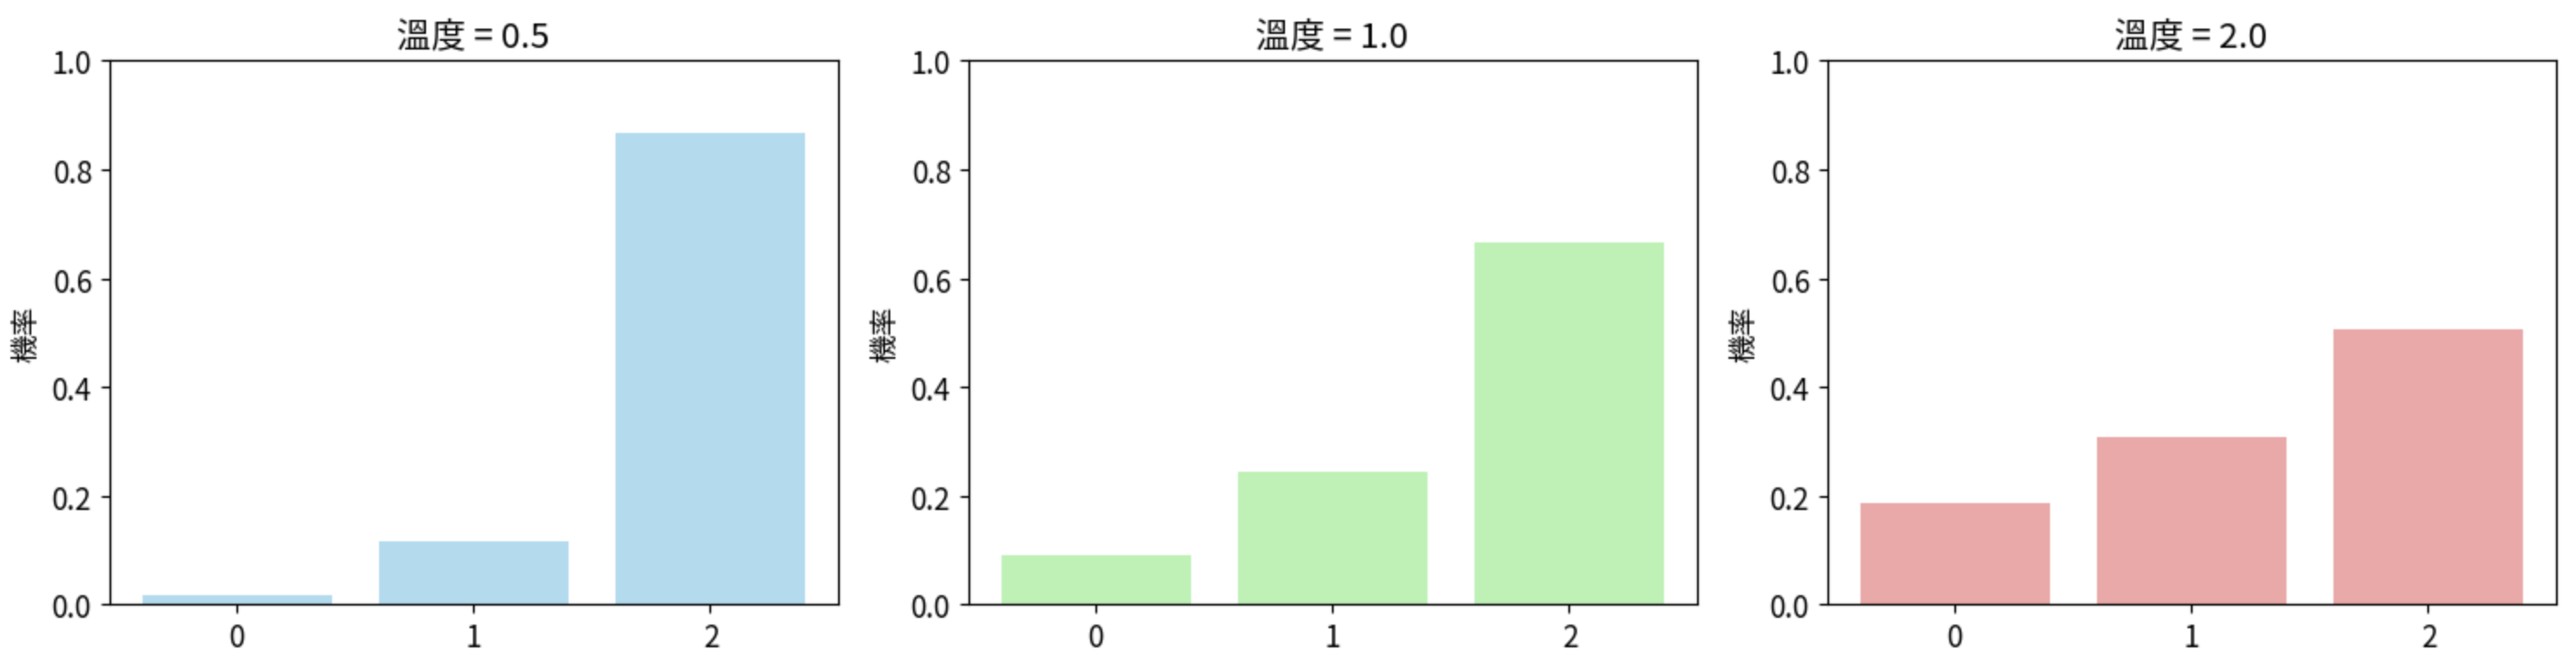

上圖為調整 Softmax 的溫度參數，以觀察在數據維持相同的情況下，不同溫度對 Softmax 機率分布影響的結果。與溫度 = 1.0（維持 Softmax 結果的機率分布）比較，我們可以觀察到在低溫的情況下（銳利度高），機率分布的差距更加明顯；而在高溫的情況下（銳利度低），機率分布的差異就相對比較不顯著。

### **<font color='4169E1'>7. 練習</font>**

**💡 請同學們嘗試以下練習**
1. 設定三個很接近的數值（例如 2.0, 2.01, 2.02），觀察 Softmax 的結果。
2. 逐漸增加其中一個數值，觀察「贏者通吃」效應何時變得明顯。
3. 嘗試負數值，看看會發生什麼事。
4. 調整溫度參數，觀察對結果分布的影響。

**💡 思考問題**

1. 為什麼即使輸入值差異很小，Softmax 還是會放大差異？
2. 在什麼情況下我們會希望有「贏者通吃」的特性？
3. 溫度參數在實際應用中有什麼用途？

In [ ]:
def quick_test(values_str):
    """
    快速測試函數，輸入格式: "1,2,3"
    """
    try:
        values = np.array([float(x.strip()) for x in values_str.split(',')])
        soft = softmax(values)
        print(f"輸入: {values}")
        print(f"Softmax: {soft}")
        print(f"各項百分比: {soft * 100}")
        return soft
    except:
        print("請輸入正確格式，例如: '1,2,3'")

print("🚀 快速測試工具：")
print("使用方法: quick_test('1,2,3')")

🚀 快速測試工具：
使用方法: quick_test('1,2,3')
